# Cross validation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

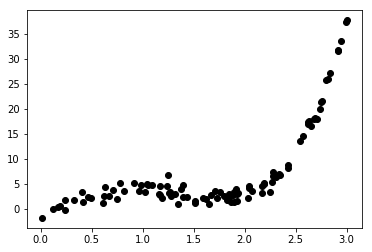

In [14]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [15]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [17]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -5.091408 (0.895383)
PR2: -3.188180 (0.848369)
PR3: -1.050552 (0.120521)
PR4: -0.811048 (0.082078)
PR5: -0.827597 (0.077064)
PR6: -0.833292 (0.076630)


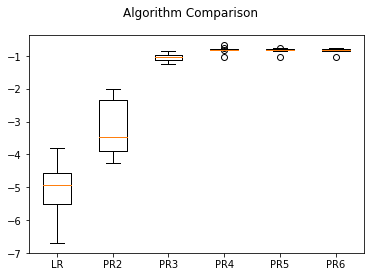

In [18]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()  

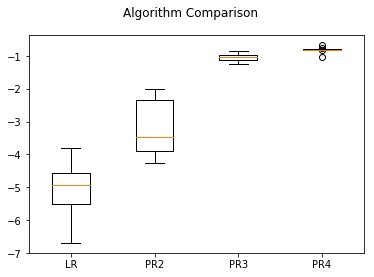

In [19]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results[0:4])
ax.set_xticklabels(names)
plt.show() 

# Zdanie 
Zinterpretuj wyniki. 